In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import helper

In [7]:
data = pd.read_csv('../input/preprocessed_data.csv')
data = helper.remove_outliers_z_score(data)
X = data.drop('revenue', axis=1)
X = helper.data_standardizer(X,20)

y = data['revenue']
y = y.apply(helper.revenue_log)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/Users/house/Desktop/machine learning/machineLearning/dnn/helper.py:75: RuntimeWarning: divide by zero encountered in log
  res = np.log(y)


Training fold 1...
Training fold 2...
Training fold 3...
Training fold 4...
Training fold 5...
17/17 [==============================] - 0s 356us/step


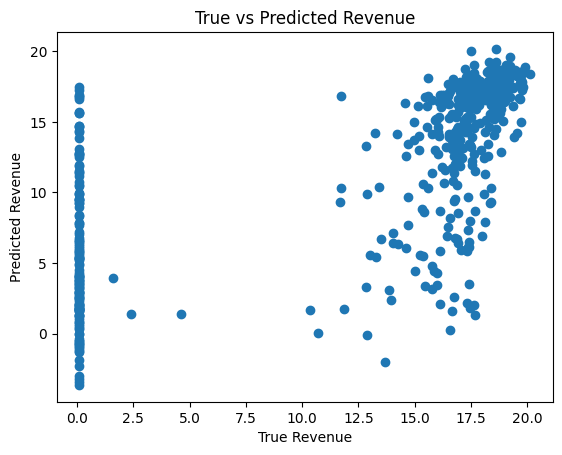

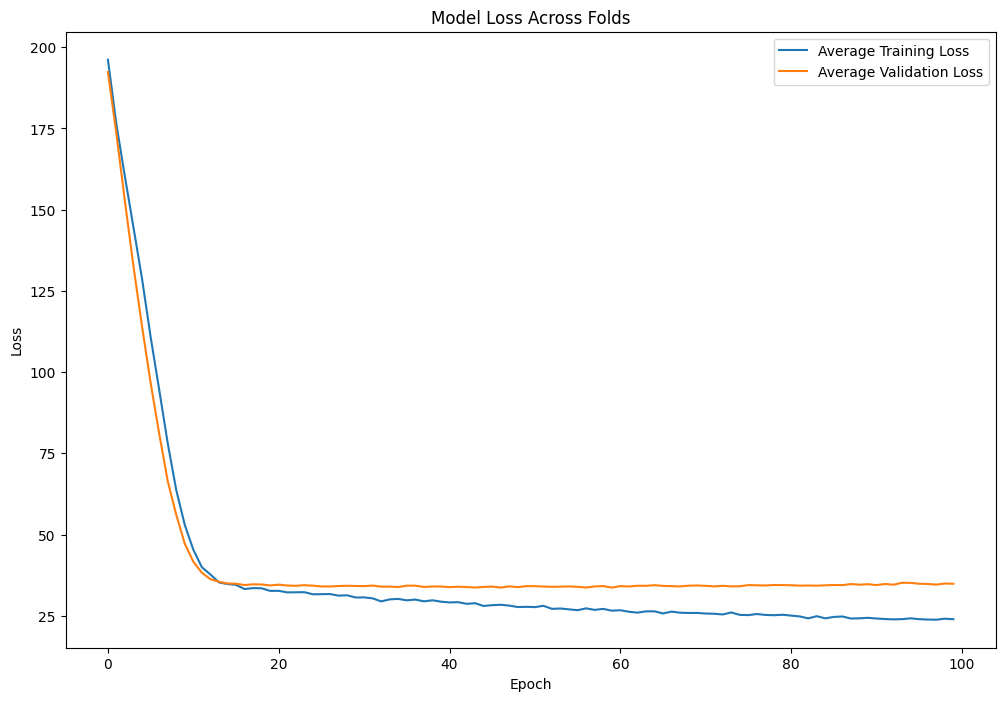

In [26]:


def create_model(input_dim):
    model = Sequential([
        Dense(100, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(50, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(20, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(1) 
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_no = 1
losses = []
val_losses = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = create_model(X_train.shape[1])

    print(f'Training fold {fold_no}...')
    history = model.fit(X_train_fold, y_train_fold, 
                        epochs=100, batch_size=32, 
                        validation_data=(X_val_fold, y_val_fold), 
                        verbose=0)

    losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    
    fold_no += 1

avg_loss = np.mean(losses, axis=0)
avg_val_loss = np.mean(val_losses, axis=0)

preds = model.predict(X_test)

plt.scatter(y_test, preds)
plt.xlabel('True Revenue')
plt.ylabel('Predicted Revenue')
plt.title('True vs Predicted Revenue')
plt.show()


plt.figure(figsize=(12, 8))
plt.plot(avg_loss, label='Average Training Loss')
plt.plot(avg_val_loss, label='Average Validation Loss')
plt.title('Model Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Epoch 1/150
17/17 [==============================] - 0s 4ms/step - loss: 207.7785 - val_loss: 212.7393 - lr: 0.0050
Epoch 2/150
17/17 [==============================] - 0s 1ms/step - loss: 201.9966 - val_loss: 203.0941 - lr: 0.0050
Epoch 3/150
17/17 [==============================] - 0s 1ms/step - loss: 195.6219 - val_loss: 189.9635 - lr: 0.0050
Epoch 4/150
17/17 [==============================] - 0s 1ms/step - loss: 187.1405 - val_loss: 173.3732 - lr: 0.0050
Epoch 5/150
17/17 [==============================] - 0s 1ms/step - loss: 176.1891 - val_loss: 154.2531 - lr: 0.0050
Epoch 6/150
17/17 [==============================] - 0s 1ms/step - loss: 163.8636 - val_loss: 134.6819 - lr: 0.0050
Epoch 7/150
17/17 [==============================] - 0s 1ms/step - loss: 150.8837 - val_loss: 110.9837 - lr: 0.0050
Epoch 8/150
17/17 [==============================] - 0s 1ms/step - loss: 137.7707 - val_loss: 91.5796 - lr: 0.0050
Epoch 9/150
17/17 [==============================] - 0s 1ms/step - loss: 

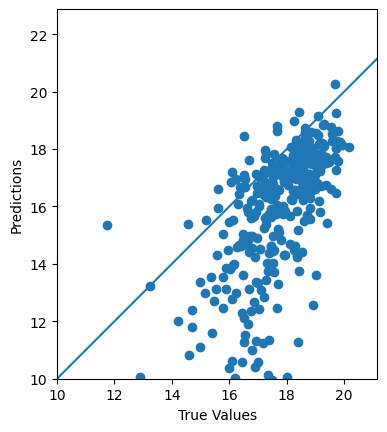

In [27]:


model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation='relu'),
    BatchNormalization(),
    Dense(1)  # No activation for output layer
])

optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=128,  
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')
predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,plt.xlim()[1]])
plt.ylim([10,plt.ylim()[1]])


_ = plt.plot([-100, 100], [-100, 100])



Epoch 1/150
17/17 [==============================] - 1s 10ms/step - loss: 180.3887 - val_loss: 326.7217 - lr: 0.0050
Epoch 2/150
17/17 [==============================] - 0s 5ms/step - loss: 152.1926 - val_loss: 359.3181 - lr: 0.0050
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 120.9739 - val_loss: 138.1675 - lr: 0.0050
Epoch 4/150
17/17 [==============================] - 0s 5ms/step - loss: 83.3199 - val_loss: 67.9605 - lr: 0.0050
Epoch 5/150
17/17 [==============================] - 0s 5ms/step - loss: 50.4364 - val_loss: 38.1168 - lr: 0.0050
Epoch 6/150
17/17 [==============================] - 0s 5ms/step - loss: 35.7612 - val_loss: 31.3296 - lr: 0.0050
Epoch 7/150
17/17 [==============================] - 0s 5ms/step - loss: 29.6914 - val_loss: 30.9799 - lr: 0.0050
Epoch 8/150
17/17 [==============================] - 0s 5ms/step - loss: 28.0460 - val_loss: 34.2430 - lr: 0.0050
Epoch 9/150
17/17 [==============================] - 0s 6ms/step - loss: 26.5148 

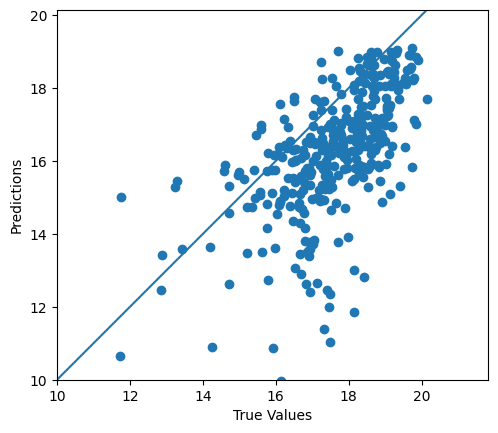

In [28]:

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)  # No activation for output layer
])

optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=128,  
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')
predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,plt.xlim()[1]])
plt.ylim([10,plt.ylim()[1]])


_ = plt.plot([-100, 100], [-100, 100])
